In [74]:
import numpy as np
import pandas as pd

data = { 
    'Feature 1': ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy'],
    'Feature 2': ['Hot','Mild','Hot','Cool','Mild','Hot'],
    'Class':  ['No','No','Yes','Yes','Yes','No']
}
df = pd.DataFrame(data)
df

,Feature 1,Feature 2,Class
0,Sunny,Hot,No
1,Sunny,Mild,No
2,Overcast,Hot,Yes
3,Rainy,Cool,Yes
4,Rainy,Mild,Yes
5,Rainy,Hot,No


In [75]:
# 1

from math import log2
overcast_subset = df[df['Feature 1'] == 'Overcast']
class_counts = overcast_subset['Class'].value_counts()

entropy_of_Overcast = 0
total = len(overcast_subset)
for count in class_counts:
    t = count / total
    entropy_of_Overcast -= t * log2(t)

entropy_of_Overcast

0.0

In [76]:
# 2
from collections import Counter

def entropy(data):
    total = len(data)
    counts = Counter(data)
    return -sum((count/total) * log2(count/total) for count in counts.values())

entropy_s = entropy(df['Class'])

feature2_values = df['Feature 2'].unique()
weighted_entropy = 0

for val in feature2_values:
    subset = df[df['Feature 2'] == val]
    e = entropy(subset['Class'])
    weighted_entropy += len(subset) / len(df) * e

info_gain_feature2 = entropy_s - weighted_entropy
print("Information Gain for Feature 2 : ",info_gain_feature2)

Information Gain for Feature 2 :  0.20751874963942196


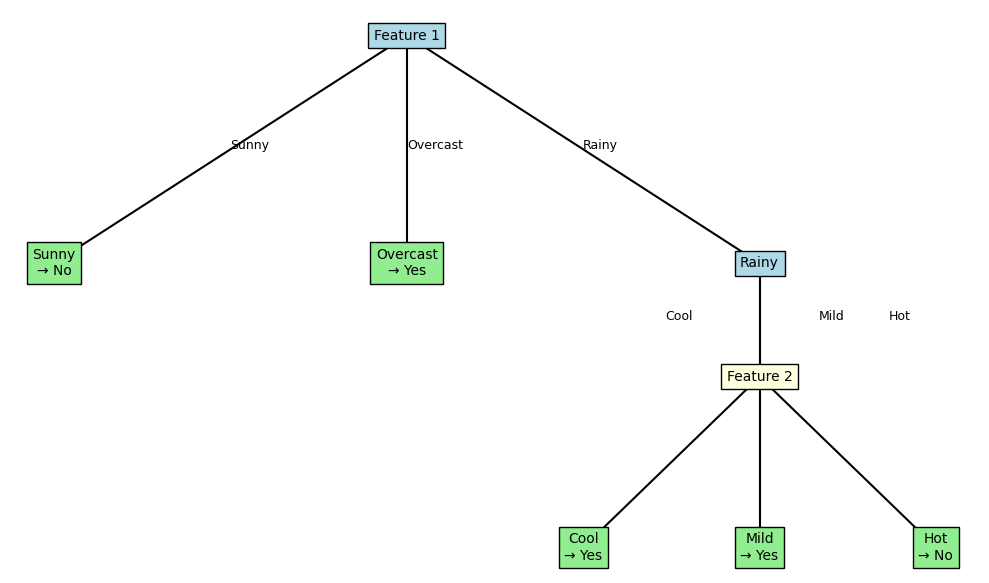

In [77]:
# 3

import matplotlib.pyplot as plt

def draw_decision_tree():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # ซ่อนแกนกราฟ

    # ตำแหน่งของแต่ละ node (x, y)
    positions = {
        'Feature1': (0.5, 1.0),
        'Sunny': (0.2, 0.6),
        'Overcast': (0.5, 0.6),
        'Rainy': (0.8, 0.6),
        'Rainy_Feature2': (0.8, 0.4),
        'Cool': (0.65, 0.1),
        'Mild': (0.8, 0.1),
        'Hot': (0.95, 0.1),
    }

    # วาดเส้นเชื่อม (branch)
    ax.plot([0.5, 0.2], [1.0, 0.6], 'k-')   # Feature1 -> Sunny
    ax.plot([0.5, 0.5], [1.0, 0.6], 'k-')   # Feature1 -> Overcast
    ax.plot([0.5, 0.8], [1.0, 0.6], 'k-')   # Feature1 -> Rainy

    ax.plot([0.8, 0.8], [0.6, 0.4], 'k-')   # Rainy -> Feature2
    ax.plot([0.8, 0.65], [0.4, 0.1], 'k-')  # Feature2 -> Cool
    ax.plot([0.8, 0.8], [0.4, 0.1], 'k-')   # Feature2 -> Mild
    ax.plot([0.8, 0.95], [0.4, 0.1], 'k-')  # Feature2 -> Hot

    # วาดกล่องข้อความ (node)
    def node(xy, text, color='lightblue'):
        ax.text(*xy, text, ha='center', va='center', fontsize=10,
                bbox=dict(facecolor=color, edgecolor='black'))

    # Root
    node(positions['Feature1'], 'Feature 1')

    # Leaf และ Sub-node
    node(positions['Sunny'], 'Sunny\n→ No', 'lightgreen')
    node(positions['Overcast'], 'Overcast\n→ Yes', 'lightgreen')
    node(positions['Rainy'], 'Rainy', 'lightblue')
    node(positions['Rainy_Feature2'], 'Feature 2', 'lightyellow')

    node(positions['Cool'], 'Cool\n→ Yes', 'lightgreen')
    node(positions['Mild'], 'Mild\n→ Yes', 'lightgreen')
    node(positions['Hot'], 'Hot\n→ No', 'lightgreen')

    # Label เส้น (branch labels)
    ax.text(0.35, 0.8, 'Sunny', fontsize=9)
    ax.text(0.5, 0.8, 'Overcast', fontsize=9)
    ax.text(0.65, 0.8, 'Rainy', fontsize=9)

    ax.text(0.72, 0.5, 'Cool', fontsize=9)
    ax.text(0.85, 0.5, 'Mild', fontsize=9)
    ax.text(0.91, 0.5, 'Hot', fontsize=9)

    plt.tight_layout()
    plt.show()

# เรียกฟังก์ชันวาดต้นไม้
draw_decision_tree()

In [78]:
# 4

# Start with the dataset
    # 1,000 samples and 20 features
# Build 5 trees, repeating the following for each tree:
# Step 1: Bootstrap Sampling
    # Randomly sample 1,000 rows from the original dataset with replacement
# Step 2: Train a Decision Tree
    # At each node split, randomly select a subset of features (typically √20 ≈ 4 or 5 features)
    # Use only these selected features to determine the best split
# Step 3: Continue Splitting
    # Build the tree until stopping conditions are met (e.g., max depth, minimum samples per leaf)
# Combine the 5 trees
    # For classification: use majority voting from all 5 trees
    # For regression: use the average prediction from all 5 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a synthetic dataset with 1000 samples and 20 features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Build a Random Forest with 5 trees
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X, y)

# Make predictions
predictions = rf.predict(X)

In [79]:
# 5

# Bagging (short for Bootstrap Aggregating) builds multiple independent models in parallel and 
# combines their predictions to improve overall performance and reduce variance.

# Boosting builds models sequentially, where each new model tries to correct the mistakes of the previous ones. 
# It focuses on reducing bias and improving weak learners.

In [80]:
# 6

import numpy as np
import pandas as pd

data = {
    'จุด': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
    'X1': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5],
    'X2': [4.0, 5.5, 2.0, 3.0, 4.5, 1.0, 5.0, 2.5, 3.5, 5.5],
    'y':  [1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)
df = df.set_index('จุด')

eta = 0.5  
lambd = 0  

df['F0'] = 0
df['p0'] = 1 / (1 + np.exp(-df['F0']))
df['g'] = df['y'] - df['p0']
df['h'] = df['p0'] * (1 - df['p0'])

print("Epoch 1: สร้างต้นไม้ F1")

left1_idx = df.index[df['X1'] < 3.0]
right1_idx = df.index[df['X1'] >= 3.0]

left1 = df.loc[left1_idx]
right1 = df.loc[right1_idx]

def calc_leaf_weight(g, h, lambd):
    return -g.sum() / (h.sum() + lambd)

w_left1 = calc_leaf_weight(left1['g'], left1['h'], lambd)
w_right1 = calc_leaf_weight(right1['g'], right1['h'], lambd)

print(f"X1 < 3.0")
print(f"(A,B,C,D) = {-left1['g'].sum():.2f} / {left1['h'].sum():.2f} = {w_left1:.2f}")
print(f"(E,F,G,H,I,J) = {-right1['g'].sum():.2f} / {right1['h'].sum():.2f} = {w_right1:.2f}")

df['f1'] = df['X1'].apply(lambda x: w_left1 if x < 3.0 else w_right1)
df['F1'] = df['F0'] + eta * df['f1']

print("\nEpoch 2: สร้างต้นไม้ F2")

left2_idx = df.index[df['X2'] <= 3.5]
right2_idx = df.index[df['X2'] > 3.5]

left2 = df.loc[left2_idx]
right2 = df.loc[right2_idx]

w_left2 = calc_leaf_weight(left2['g'], left2['h'], lambd)
w_right2 = calc_leaf_weight(right2['g'], right2['h'], lambd)

print(f"X2 > 3.5")
print(f"(A,B,E,G,J) = {-right2['g'].sum():.2f} / {right2['h'].sum():.2f} = {w_right2:.2f}")
print(f"(C,D,F,H,I) = {-left2['g'].sum():.2f} / {left2['h'].sum():.2f} = {w_left2:.2f}")

df['f2'] = df['X2'].apply(lambda x: w_right2 if x > 3.5 else w_left2)
df['F2'] = df['F1'] + eta * df['f2']

df['p_final'] = 1 / (1 + np.exp(-df['F2']))
df['y_pred'] = df['p_final'].apply(lambda x: 1 if x >= 0.5 else 0)

accuracy = (df['y_pred'] == df['y']).mean()

print("\nผลลัพธ์สุดท้าย\n")
print(df[['X1', 'X2', 'y', 'y_pred', 'F1', 'F2', 'p_final']])
print(f"\nFinal Accuracy: {accuracy:.2f}")

Epoch 1: สร้างต้นไม้ F1
X1 < 3.0
(A,B,C,D) = -0.00 / 1.00 = -0.00
(E,F,G,H,I,J) = -0.00 / 1.50 = -0.00

Epoch 2: สร้างต้นไม้ F2
X2 > 3.5
(A,B,E,G,J) = -2.50 / 1.25 = -2.00
(C,D,F,H,I) = 2.50 / 1.25 = 2.00

ผลลัพธ์สุดท้าย

      X1   X2  y  y_pred   F1   F2   p_final
จุด                                         
A    1.0  4.0  1       0  0.0 -1.0  0.268941
B    1.5  5.5  1       0  0.0 -1.0  0.268941
C    2.0  2.0  0       1  0.0  1.0  0.731059
D    2.5  3.0  0       1  0.0  1.0  0.731059
E    3.0  4.5  1       0  0.0 -1.0  0.268941
F    3.5  1.0  0       1  0.0  1.0  0.731059
G    4.0  5.0  1       0  0.0 -1.0  0.268941
H    4.5  2.5  0       1  0.0  1.0  0.731059
I    5.0  3.5  0       1  0.0  1.0  0.731059
J    5.5  5.5  1       0  0.0 -1.0  0.268941

Final Accuracy: 0.00
